# 120 Years Of Olympics:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [2]:
#storing the original data into a variable called olympics
olympics=pd.read_csv('athlete_events.csv')

In [3]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#making a duplicate copy of original data 
df=olympics.copy()

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
#using Shape method we will know the number of columns and rows and columns in our dataset
df.shape

(271116, 15)

In [7]:
#describe method lets us know the numerical columns in our dataset
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [8]:
#info() gives us the information of entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
#we found that our columns contain case sensitive so we gonna convert it to lower case 
df.columns=df.columns.map(str.lower)

In [10]:
df.columns

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')

In [11]:
#change of data types in our dataset
data_types={'id':str,'age':str,'height':str,'weight':str,'year':str}

In [12]:
df=df.astype(data_types)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
id        271116 non-null object
name      271116 non-null object
sex       271116 non-null object
age       271116 non-null object
height    271116 non-null object
weight    271116 non-null object
team      271116 non-null object
noc       271116 non-null object
games     271116 non-null object
year      271116 non-null object
season    271116 non-null object
city      271116 non-null object
sport     271116 non-null object
event     271116 non-null object
medal     39783 non-null object
dtypes: object(15)
memory usage: 31.0+ MB


In [14]:
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
#finding the duplicate values in our dataset
df[df.duplicated(['name','team','games','year','season','city','sport','medal'],keep=False)]

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN


In [16]:
#dropping the duplicate values
df.drop_duplicates(['name','team','games','year','season','city','sport','medal'],keep='first',inplace=True)

In [17]:
df[df.duplicated(['name','team','games','year','season','city','sport','medal'])]

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal


In [18]:
df.isnull().sum()

id             0
name           0
sex            0
age            0
height         0
weight         0
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     162634
dtype: int64

In [19]:
df.fillna('No',inplace=True)

In [20]:
df.isnull().sum()

id        0
name      0
sex       0
age       0
height    0
weight    0
team      0
noc       0
games     0
year      0
season    0
city      0
sport     0
event     0
medal     0
dtype: int64

In [21]:
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,3,Gunnar Nielsen Aaby,M,24.0,nan,nan,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,4,Edgar Lindenau Aabye,M,34.0,nan,nan,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No


In [22]:
df.height=df.height.str.replace('nan','0.0')
df.weight=df.weight.str.replace('nan','0.0')
df.age=df.age.str.replace('nan','0.0')

In [23]:
df.age=df.age.astype(float)

In [24]:
df.age=df.age.astype(int)

In [25]:
df.age=df.age.astype(str)

In [26]:
df.age.head()

0    24
1    23
2    24
3    34
4    21
Name: age, dtype: object

In [27]:
df.season.value_counts()

Summer    168777
Winter     31555
Name: season, dtype: int64

In [28]:
df.medal.value_counts()

No        162634
Bronze     12880
Silver     12590
Gold       12228
Name: medal, dtype: int64

# Pie Chart according to gender for Summer And  Winter Olympics:

C:\Users\Prem Kumar\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1540: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  results = ax.pie(y, labels=blabels, **kwds)


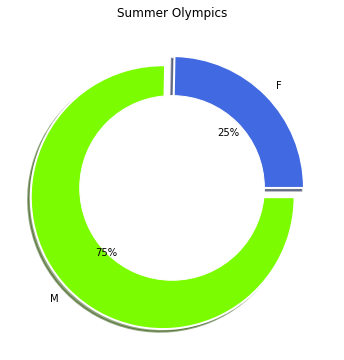

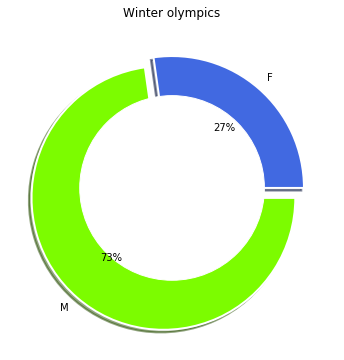

In [29]:
plt.figure(figsize=(13,16))
plt.subplot(121)
summer=df[df.season=='Summer']
summer.groupby('sex')['id'].nunique().plot.pie(autopct='%1.0f%%',
                                              wedgeprops={'linewidth':2,'edgecolor':'W'},
                                              explode=[0,0.1],
                                              shadow=True,
                                              colors=['royalblue','lawngreen'])
plt.ylabel('')
circle=plt.Circle((0,0),0.7,color='White')
plt.gca().add_artist(circle)
plt.title('Summer Olympics');

plt.figure(figsize=(13,16))
plt.subplot(122)
winter=df[df.season=='Winter']
winter.groupby('sex')['id'].nunique().plot.pie(autopct='%1.0f%%',
                                              wedgeprops={'linewidth':2,'edgecolor':'W'},
                                              explode=[0,0.1],
                                              shadow=True,
                                              colors=['royalblue','lawngreen'])
plt.ylabel('')
circle1=plt.Circle((0,0),0.7,color='White')
plt.gca().add_artist(circle1)
plt.title('Winter olympics');

# Athletics overs years for Summer and Winter olympics

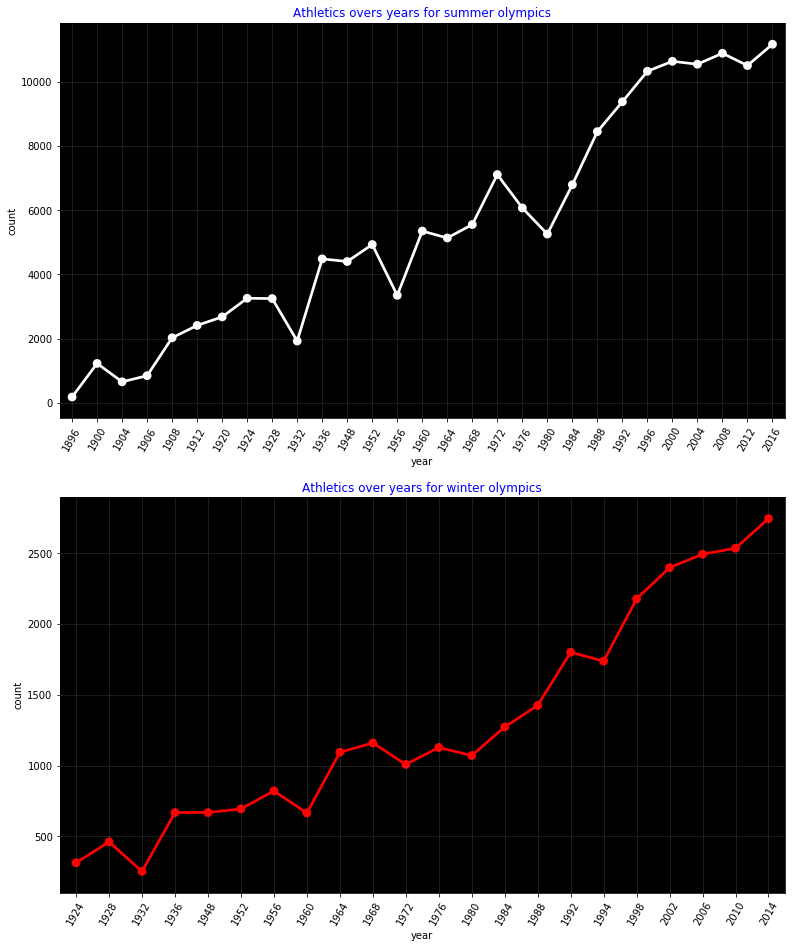

In [31]:
fig=plt.figure(figsize=(13,16))
plt.subplot(211)

sum_c = summer.groupby(["year"])["id"].nunique().reset_index()
win_c = winter.groupby(["year"])["id"].nunique().reset_index()

ax=sns.pointplot(x=sum_c.year,y=sum_c.id,color='White',marker='h')
plt.xticks(rotation=60)
plt.ylabel('count')
ax.set_facecolor('k')
plt.grid(True,alpha=0.2)
plt.title('Athletics overs years for summer olympics',color='b');

plt.subplot(212)
ax=sns.pointplot(x=win_c.year,y=win_c.id,color='red',marker='h')
plt.xticks(rotation=60)
ax.set_facecolor('k')
plt.grid(True,alpha=0.2)
plt.ylabel('count')
plt.title('Athletics over years for winter olympics',color='b');

# Countries participated at the summer and winter olympic games

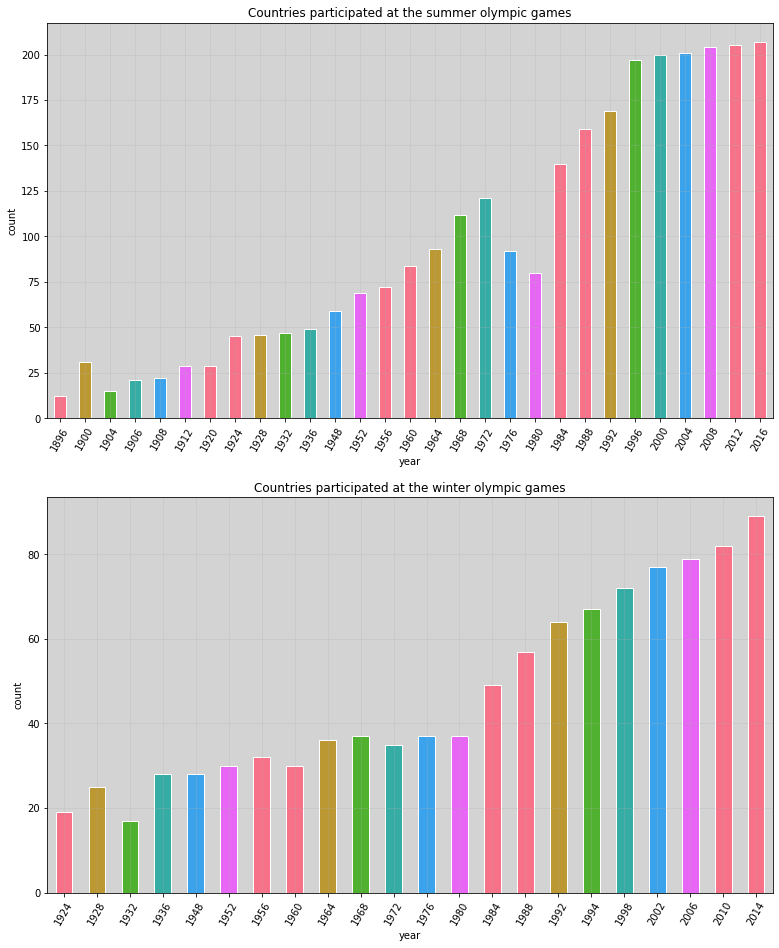

In [32]:
plt.figure(figsize=(13,16))
plt.subplot(211)
ax=summer.groupby('year')['noc'].nunique().plot(kind='bar',color=sns.color_palette('husl'),
                                                linewidth=1,edgecolor='W'*summer.year.nunique())
plt.grid(True,alpha=0.3)
plt.xticks(rotation=60)
ax.set_facecolor('lightgrey')
plt.ylabel('count')
plt.title('Countries participated at the summer olympic games');

plt.subplot(212)
ax=winter.groupby('year')['noc'].nunique().plot(kind='bar',color=sns.color_palette('husl'),
                                               linewidth=1,edgecolor='W'*summer.year.nunique())
plt.xticks(rotation=60)
plt.ylabel('count')
ax.set_facecolor('lightgrey')
plt.grid(True,alpha=0.3)
plt.title('Countries participated at the winter olympic games');

# Countries-Summer and Winter Olympics

C:\Users\Prem Kumar\Anaconda3\lib\site-packages\seaborn\categorical.py:1616: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=self.colors, align="center", **kws)


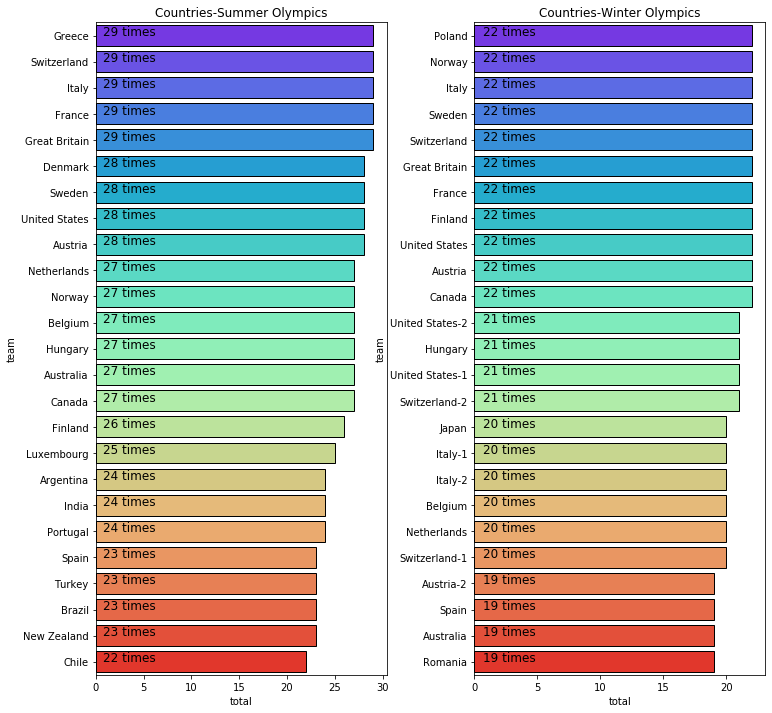

In [32]:
yr_cn=pd.crosstab(summer.team,summer.year).reset_index()
cols=yr_cn.columns[1:]


for i in cols:
    yr_cn[i]=np.where(yr_cn[i]>0,1,0)

yr_cn['total']=yr_cn[cols].sum(axis=1)
yr_cn=yr_cn.sort_values(by='total',ascending=False)

plt.figure(figsize=(12,12))
plt.subplot(121)
ax=sns.barplot('total','team',data=yr_cn[:25],linewidth=1,edgecolor='k'*25,palette='rainbow')
for i,j in enumerate(yr_cn.total[:25].astype(str)+' times'):
    ax.text(0.7,i,j,fontsize=12)

plt.title('Countries-Summer Olympics');


yr_wn=pd.crosstab(winter.team,winter.year).reset_index()
cols=yr_wn.columns[1:]

for i in cols:
    yr_wn[i]=np.where(yr_wn[i]>0,1,0)

yr_wn['total']=yr_wn[cols].sum(axis=1)
yr_wn=yr_wn.sort_values(by='total',ascending=False)

plt.subplot(122)
ax=sns.barplot('total','team',data=yr_wn[:25],linewidth=1,edgecolor='K'*25,palette='rainbow')
for i,j in enumerate(yr_wn.total[:25].astype(str)+' times'):
    ax.text(0.7,i,j,fontsize=12)
plt.title('Countries-Winter Olympics');
plt.subplots_adjust(wspace = .3)

In [33]:
cool={'weight':float,'height':float}
df=df.astype(cool)

# Height and Weight distribution of Athletics:

C:\Users\Prem Kumar\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\Prem Kumar\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


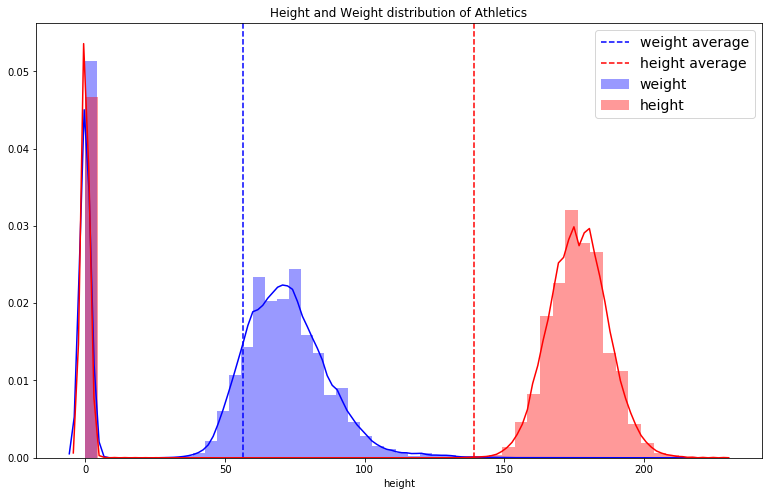

In [34]:
cols=['weight','height']
length=len(cols)
cs=['b','r']

plt.figure(figsize=(13,8))
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    sns.distplot(df[df[i].notnull()][i],color=k,label=i)
    plt.axvline(df[df[i].notnull()][i].mean(),color=k,linestyle='dashed',label=i+' average')
    plt.legend(loc='best',prop={'size':14})
    plt.title('Height and Weight distribution of Athletics')
    plt.subplots_adjust(hspace=0.2)
    plt.xticks(np.arange(0,250,50))

# Height and Weight of athletics w.r.t BMI:

Text(0.5, 1.0, 'Height and Weight of athletics w.r.t BMI')

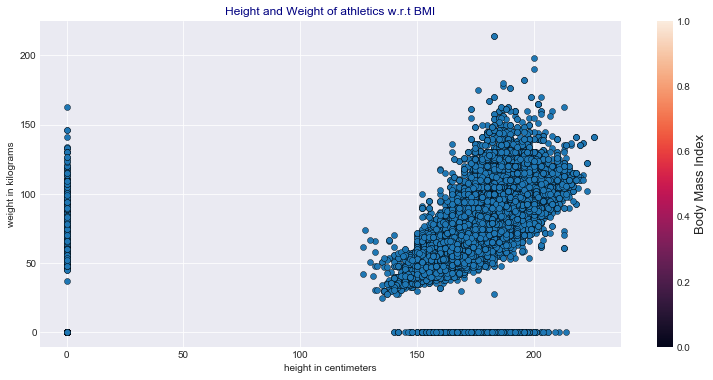

In [36]:
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')

plt.scatter(df['height'],df['weight'],cmap='jet',linewidth=0.4,edgecolor='k');
lab=plt.colorbar()
lab.set_label('Body Mass Index',fontsize=13)
plt.xlabel('height in centimeters')
plt.ylabel('weight in kilograms')
plt.title('Height and Weight of athletics w.r.t BMI',color='navy')

# 3d scatterplot for height, weight and age:

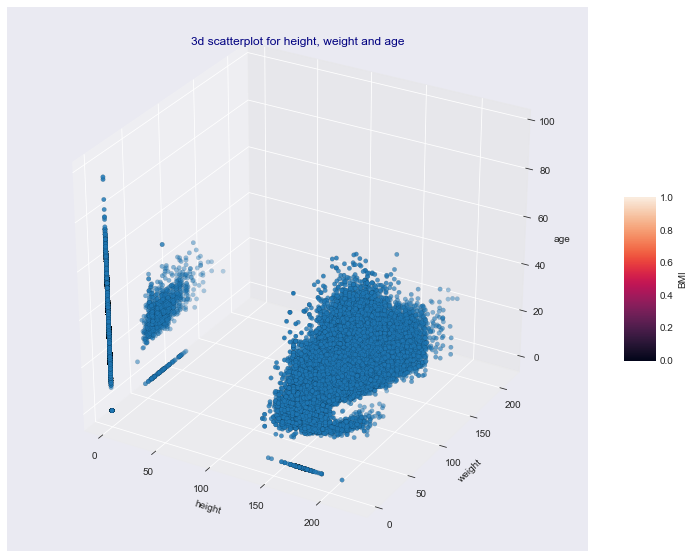

In [37]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_style('darkgrid')

fig=plt.figure(figsize=(13,10))
ax=fig.gca(projection='3d')

plot=ax.scatter(df[df['age'].notnull()]['height'].astype(int),
               df[df['age'].notnull()]['weight'].astype(int),
               df[df['age'].notnull()]['age'].astype(int),
               cmap='jet',
               edgecolor='k',
               linewidth=0.1)
lab=fig.colorbar(plot,shrink=0.3,aspect=5)
lab.set_label('BMI')
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('age')
plt.title('3d scatterplot for height, weight and age',color='navy');

# Events ratio by gender in winter olympics:

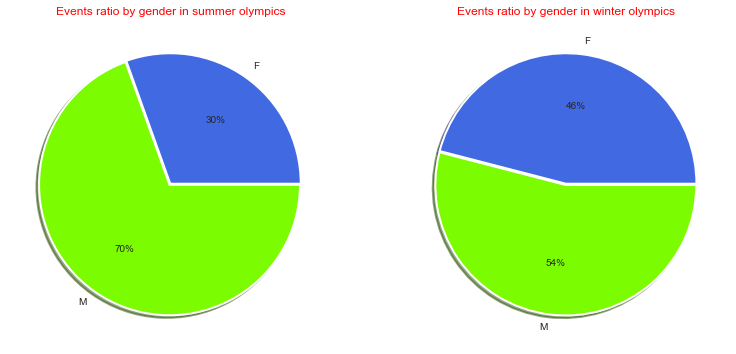

In [38]:
plt.figure(figsize=(13,6))
plt.subplot(121)
summer.groupby("sex")["event"].nunique().plot.pie(autopct = "%1.0f%%",
                                                  wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                                  explode = [0,.01],shadow = True , 
                                                  colors = ["royalblue","lawngreen"])
plt.title("Events ratio by gender in summer olympics",color = "r")
plt.ylabel("")

plt.subplot(122)
winter.groupby("sex")["event"].nunique().plot.pie(autopct = "%1.0f%%",
                                                  wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                                  explode = [0,.01],shadow = True , 
                                                  colors = ["royalblue","lawngreen"])
plt.title("Events ratio by gender in winter olympics",color = "r")
plt.ylabel("")

plt.show()

# events ratio by gender in summer and winter olympics:

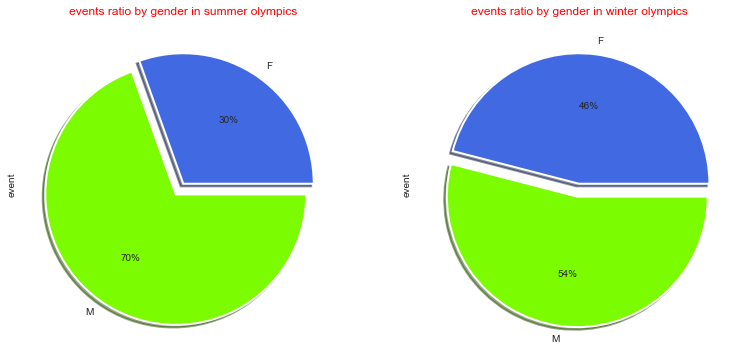

In [39]:
plt.figure(figsize=(13,6))
plt.subplot(121)

summer.groupby('sex')['event'].nunique().plot.pie(autopct='%1.0f%%',
                                                  wedgeprops={'linewidth':2,'edgecolor':'w'},
                                                  explode=[0,0.1],
                                                  shadow=True,
                                                  colors=['royalblue','lawngreen'])

plt.title('events ratio by gender in summer olympics',color='r');

plt.subplot(122)
winter.groupby('sex')['event'].nunique().plot.pie(autopct='%1.0f%%',
                                                  wedgeprops={'linewidth':2,'edgecolor':'w'},
                                                  explode=[0,0.1],
                                                  shadow=True,
                                                  colors=['royalblue','lawngreen'])
plt.title('events ratio by gender in winter olympics',color='r');

# events by gender for summer and winter olympics:

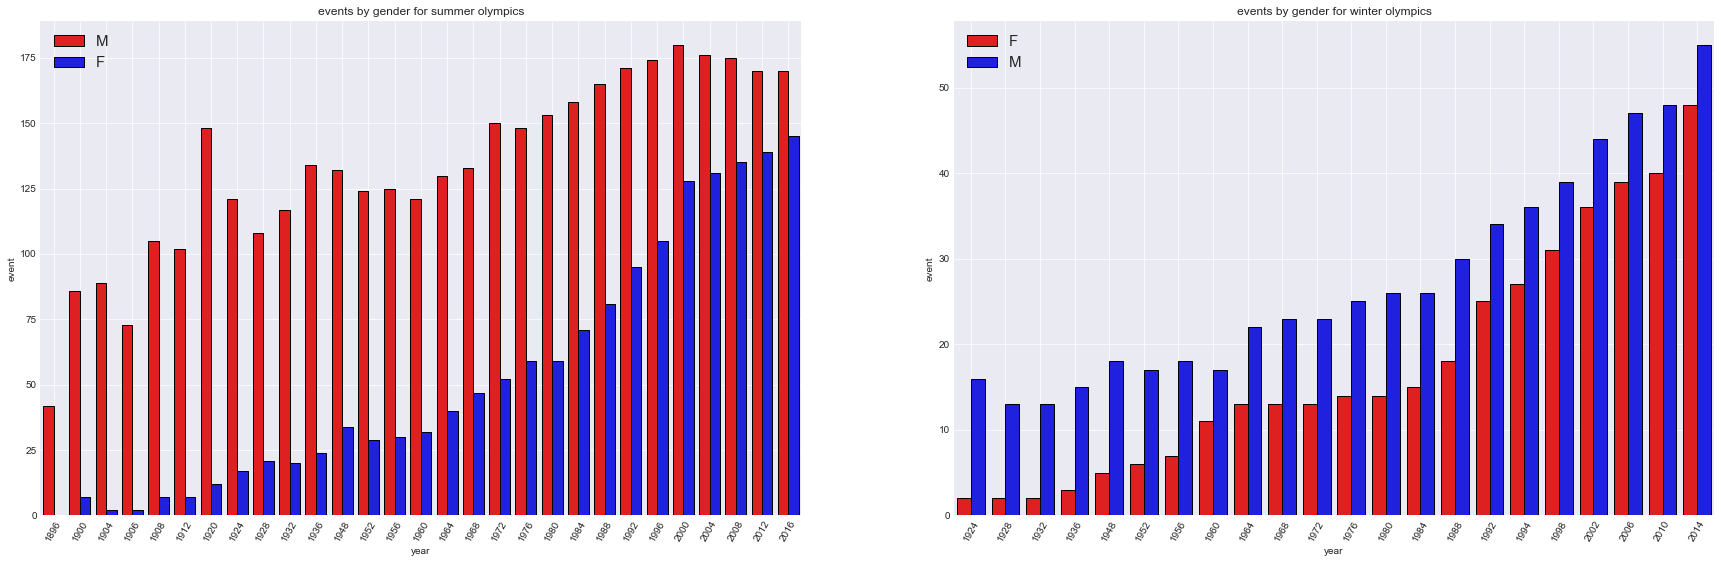

In [40]:
sns.set_style('darkgrid')

s=summer.groupby(['year','sex'])['event'].nunique().reset_index()

plt.figure(figsize=(30,20))
plt.subplot(221)
sns.barplot('year','event',data=s,hue='sex',linewidth=1,
           palette=['r','b'],edgecolor='k'*s['year'].nunique())
plt.xticks(rotation=60)
plt.grid(True)
plt.legend(loc='upper left',prop={'size':15})
plt.title('events by gender for summer olympics');

plt.subplot(222)
w=winter.groupby(['year','sex'])['event'].nunique().reset_index()

sns.barplot('year','event',data=w,hue='sex',linewidth=1,
            palette=['r','b'],edgecolor='k'*w['year'].nunique())
plt.grid(True)
plt.xticks(rotation=60)
plt.legend(loc='upper left',prop={'size':15})
plt.title('events by gender for winter olympics');